<a href="https://colab.research.google.com/github/skl30misha/data-science-portfolio/blob/main/Time%20Series/Ukr_population_of_Ukraine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description

Time Series Forecasting Population of Ukraine Using LSTM

This project implements a time series forecasting model based on LSTM (Long Short-Term Memory) to predict the population of Ukraine up to the year 2030.
It uses real historical data, applies anomaly detection and cleaning, compares results with polynomial regression, and visualizes population trends over time.



In [4]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/DS_Project_Ukraine_population')

Mounted at /content/drive


Mean of the dummy data: 43977.49
Variance of the dummy data: 5604699.41
Standard deviation of the dummy data: 2367.42


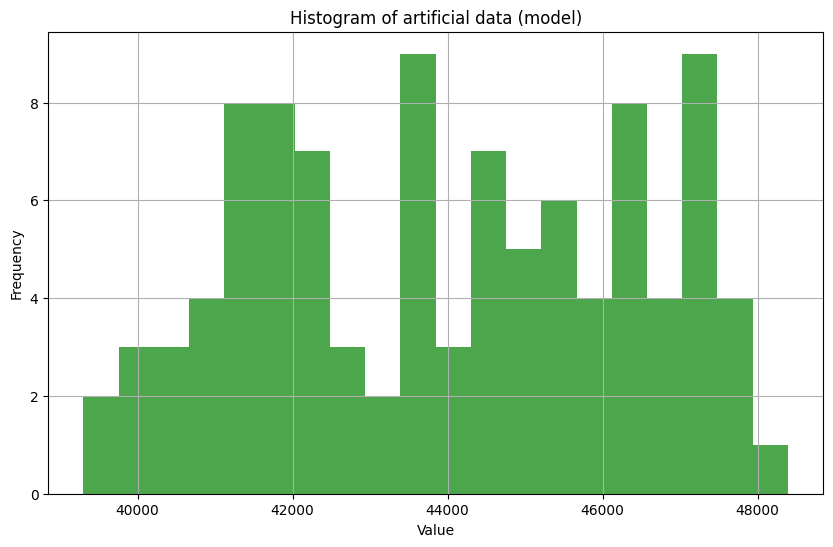

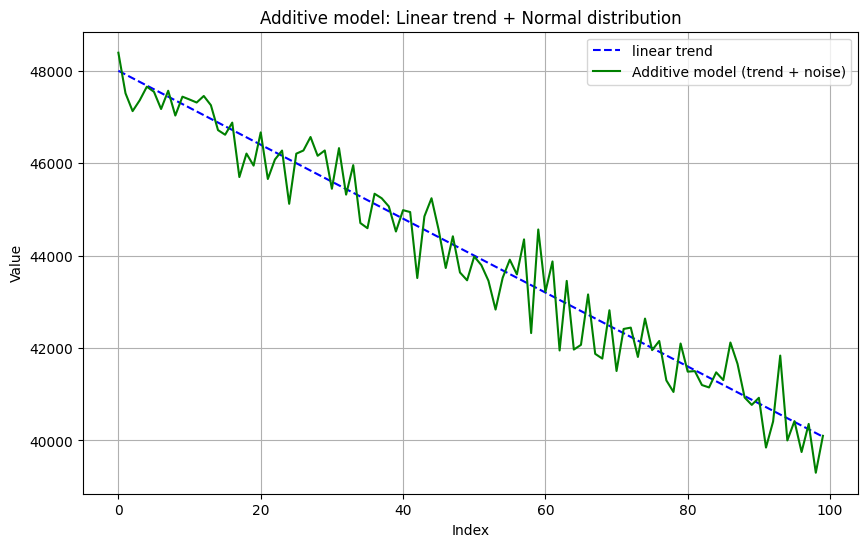

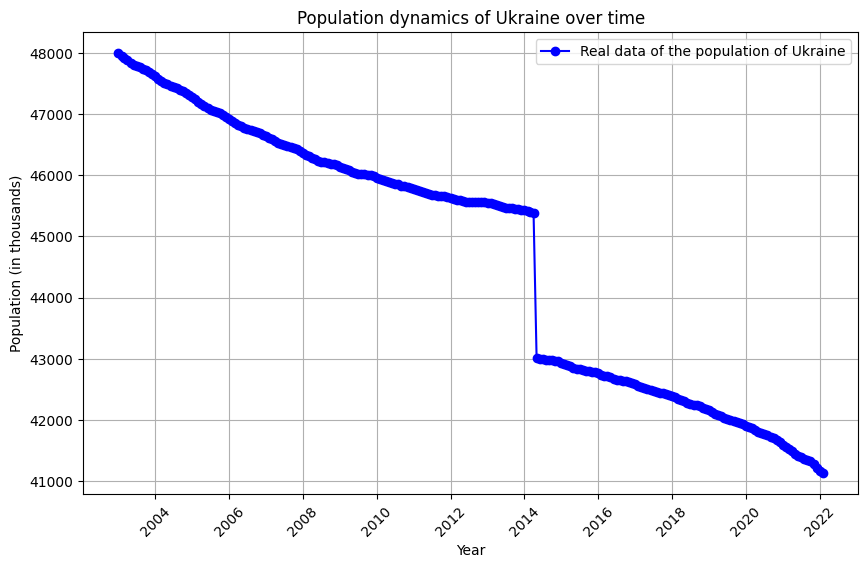

Real population mean: 44700.01
Real population variance: 4586091.16
Real population standard deviation: 2141.52


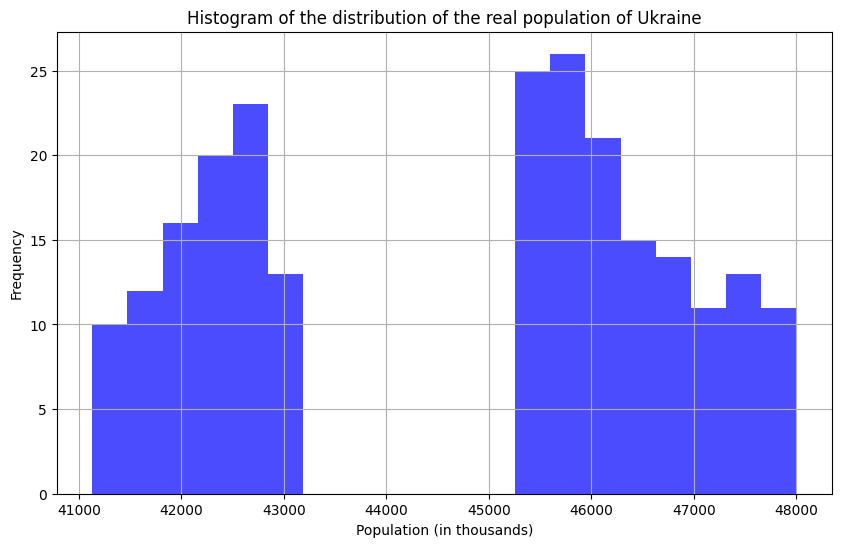

Comparison of statistical characteristics:
Real data mean: 44700.01, Artificial data mean: 43977.49
Real data variance: 4586091.16, Artificial data variance: 5604699.41
Real data standard deviation: 2141.52, Artificial data standard deviation: 2367.42


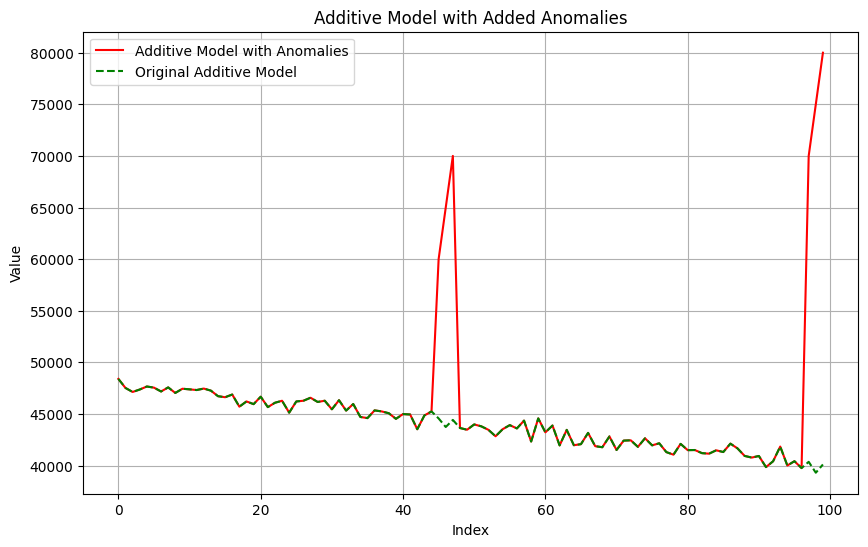

Anomalies found: [60000. 65000. 70000. 70000. 75000. 80000.]
Anomalies detected (Z-score): [70000. 70000. 75000. 80000.]


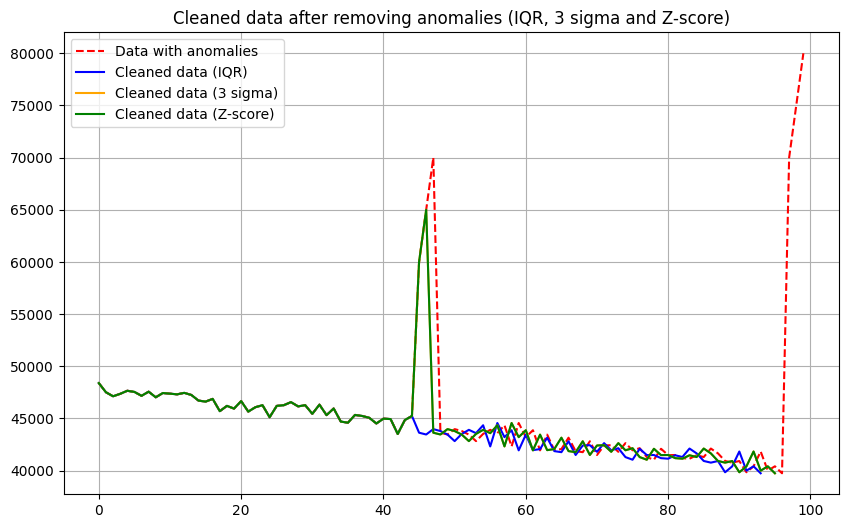


Comparison of statistical characteristics before and after cleaning:
Method       | Mean         | Variance       | SMD         
------------------------------------------------
With anomalies | 43977.49     | 5604699.41     | 2367.42     
IQR          | 44098.76     | 5409270.78     | 2325.78     
3 sigma      | 44482.12     | 12334108.65    | 3511.99     
Z-score      | 44482.12     | 12334108.65    | 3511.99     

Comparison with real data:
Real         | 44700.01     | 4586091.16     | 2141.52     


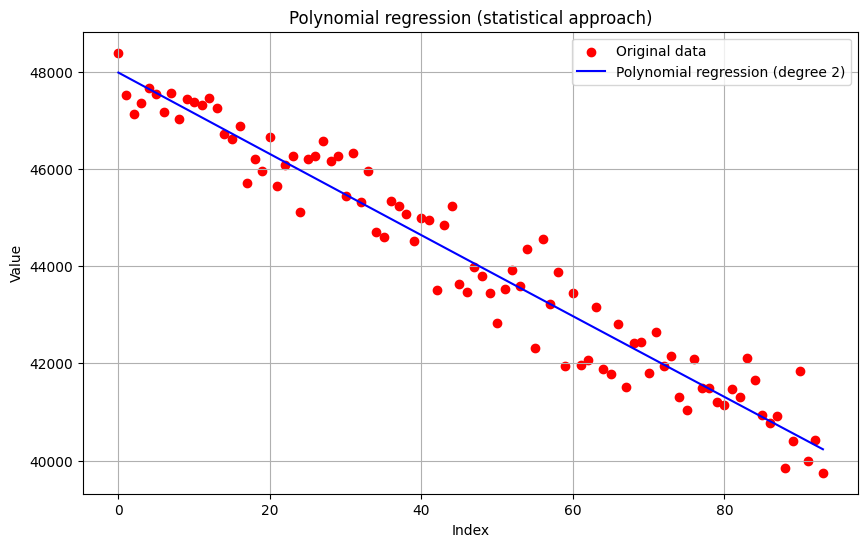

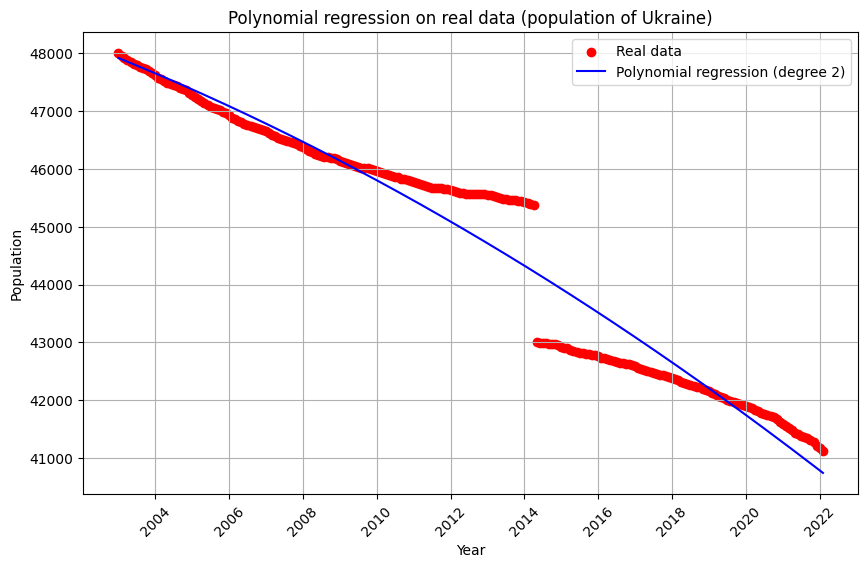

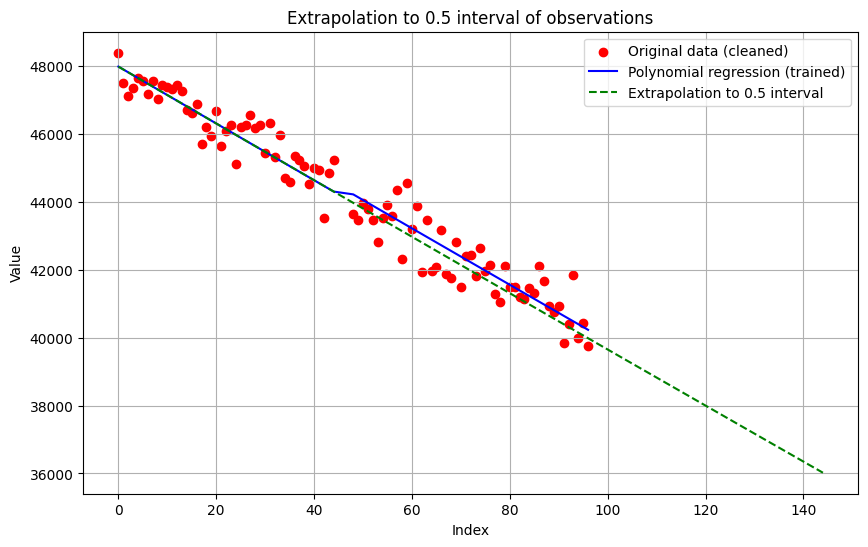

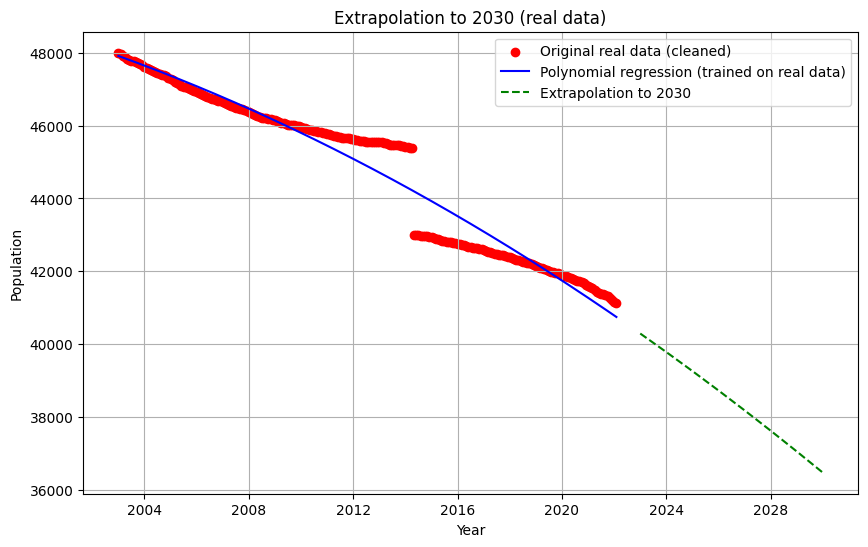

R²: 0.95
MAE: 357.34
RMSE: 487.14
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0693
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0072
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0052
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0060
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0029
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0042
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0033
Epoch 9/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0040
Epoch 10/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0037
Epoch 11/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0033
Epoch 12/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0040
Epoch 13/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0037
Epoch 14/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0023
Epoch 15/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0032


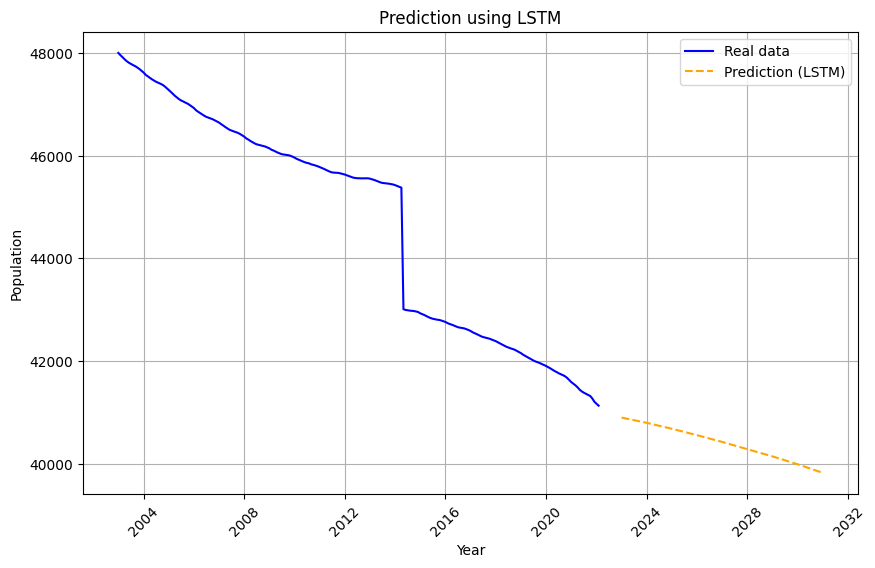

Estimate model performance on training data:
MAE: 184.51
RMSE: 253.51


"\nModel Architecture Justification:\n- Two LSTM layers with 50 neurons each were used to capture dependencies in time series data.\n- Dropout layers were applied to prevent overfitting.\n- Dense layers were added to reduce dimensionality and generate the final prediction output.\n\nAnalysis of Results – Verification of Mathematical Models and Calculations\n\n1. Characteristics of the Input Sample:\n   - A normal distribution of random variables (RVs) was used with the following parameters:\n     - Sample size: n = 100\n     - Mean value: 0\n     - Standard deviation: 500\n   - The temporal redundancy of the data is confirmed by the presence of a quadratic trend.\n\n2. Characteristics After Cleaning and Extrapolation:\n   - Statistical characteristics of synthetic data:\n     - Mean = 44,038\n     - Variance = 5,062,095\n     - Standard deviation = 2,249.91\n   - Statistical characteristics of real data:\n     - Mean = 44,700\n     - Variance = 4,586,091\n     - Standard deviation = 2,

In [5]:
#  Sakivsky Mykhailo Home Work 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator





# Step 1: Generate data drop (normal discord)
mean = 0
std_dev = 500
n = 100

random_values = np.random.normal(mean, std_dev, n)

# Step 2: Linear trend for the process
a, b = -80, 48000
linear_trend = a * np.arange(n) + b


# Step 3: Additive model: trend + random variables
additive_model = linear_trend + random_values


# Step 4: Statistical characteristics of artificial data
mean_random = np.mean(additive_model)
variance_random = np.var(additive_model)
std_dev_random = np.std(additive_model)


print(f"Mean of the dummy data: {mean_random:.2f}")
print(f"Variance of the dummy data: {variance_random:.2f}")
print(f"Standard deviation of the dummy data: {std_dev_random:.2f}")

# Histogram of random variables
plt.figure(figsize=(10, 6))
plt.hist(additive_model, bins=20, color='green', alpha=0.7)
plt.title('Histogram of artificial data (model)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualization of the additive model (linear trend + noise)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(n), linear_trend, label='linear trend', color='blue', linestyle='--')
plt.plot(np.arange(n), additive_model, label='Additive model (trend + noise)', color='green')
plt.title('Additive model: Linear trend + Normal distribution')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# Step 5: Determining the statistical characteristics of real data
df = pd.read_excel("Ukraine_Population_All_Years.xlsx")

# Convert data to numeric format without deleting or replacing rows
df['Population'] = df['Population'].str.replace('\xa0', '', regex=False).str.replace(',', '.').astype(float)
df['Year'] = pd.to_datetime(df['Year'], errors='coerce', format='на%d.%m.%Y')

# Візуалізація реальних даних
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Population'], marker='o', linestyle='-', color='b', label='Real data of the population of Ukraine')
plt.title('Population dynamics of Ukraine over time')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Population (in thousands)')
plt.grid(True)
plt.legend()
plt.show()


# Statistical characteristics of real data
mean_population = np.mean(df['Population'])
variance_population = np.var(df['Population'])
std_dev_population = np.std(df['Population'])


print(f"Real population mean: {mean_population:.2f}")
print(f"Real population variance: {variance_population:.2f}")
print(f"Real population standard deviation: {std_dev_population:.2f}")


# Population distribution histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Population'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of the distribution of the real population of Ukraine')
plt.xlabel('Population (in thousands)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 6: Output the difference between real and artificial data
print("Comparison of statistical characteristics:")
print(f"Real data mean: {mean_population:.2f}, Artificial data mean: {mean_random:.2f}")
print(f"Real data variance: {variance_population:.2f}, Artificial data variance: {variance_random:.2f}")
print(f"Real data standard deviation: {std_dev_population:.2f}, Artificial data standard deviation: {std_dev_random:.2f}")

# Step 7: Add artificial anomalies to the data
anomalies = [70000, 75000, 80000] # Anomalies
anomalies_middle = [60000, 65000, 70000] # Anomalies in the middle of the data
additive_model_with_anomalies = np.copy(additive_model)

additive_model_with_anomalies[-3:] = anomalies # Add anomalies to the end of the data
additive_model_with_anomalies[45:48] = anomalies_middle # Add anomalies in the middle of the dat


# Visualize data with anomalies
plt.figure(figsize=(10, 6))
plt.plot(np.arange(n), additive_model_with_anomalies, label='Additive Model with Anomalies', color='red')
plt.plot(np.arange(n), additive_model, label='Original Additive Model', color='green', linestyle='--')
plt.title('Additive Model with Added Anomalies')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Detect anomalies using interquartile range
Q1 = np.percentile(additive_model_with_anomalies, 25)
Q3 = np.percentile(additive_model_with_anomalies, 75)
IQR = Q3 - Q1
# Bounds for detecting anomalies
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Detect anomalies
anomalies_detected = (additive_model_with_anomalies < lower_bound) | (additive_model_with_anomalies > upper_bound)
print(f"Anomalies found: {additive_model_with_anomalies[anomalies_detected]}")
# Step 8.1: Add 3-sigma anomaly detection
mean_anomalies = np.mean(additive_model_with_anomalies)
std_dev_anomalies = np.std(additive_model_with_anomalies)



# 8.2 Bounds for detecting anomalies using the 3 sigma method
lower_bound_3sigma = mean_anomalies - 3 * std_dev_anomalies
upper_bound_3sigma = mean_anomalies + 3 * std_dev_anomalies
# Detecting anomalies using 3 sigma
anomalies_detected_3sigma = (additive_model_with_anomalies < lower_bound_3sigma) | (additive_model_with_anomalies > upper_bound_3sigma)
# Step 8.3: Add anomaly detection using Z-score
z_scores = np.abs(stats.zscore(additive_model_with_anomalies))
threshold_z = 3 # Z-score threshold
anomalies_detected_zscore = z_scores > threshold_z
print(f"Anomalies detected (Z-score): {additive_model_with_anomalies[anomalies_detected_zscore]}")
# Step 8.4 Detecting anomalies in real data
Q1_real = np.percentile(df['Population'], 25)
Q3_real = np.percentile(df['Population'], 75)
IQR_real = Q3_real - Q1_real
# Bounds for detecting anomalies in real data
lower_bound_real = Q1_real - 1.5 * IQR_real
upper_bound_real = Q3_real + 1.5 * IQR_real
# Detecting anomalies
anomalies_detected_real = (df['Population'] < lower_bound_real) | (df['Population'] > upper_bound_real)



# Step 9: Anomaly cleaning (removing anomalies) on artificial data
cleaned_data_iqr = additive_model_with_anomalies[~anomalies_detected]
cleaned_data_3sigma = additive_model_with_anomalies[~anomalies_detected_3sigma]
cleaned_data_zscore = additive_model_with_anomalies[~anomalies_detected_zscore]
# Cleaning X (indexes) for each method on artificial data
cleaned_X_iqr = np.arange(n)[~anomalies_detected]
cleaned_X_3sigma = np.arange(n)[~anomalies_detected_3sigma]
cleaned_X_zscore = np.arange(n)[~anomalies_detected_zscore]



# 9.1 Data Cleaning (Real Data: Population and Year)
cleaned_population_iqr = df['Population'][~anomalies_detected_real]
cleaned_years_iqr = df['Year'][~anomalies_detected_real]
# Visualize cleaned data for all methods
plt.figure(figsize=(10, 6))
# Visualize data with anomalies
plt.plot(np.arange(n), additive_model_with_anomalies, label='Data with anomalies', color='red', linestyle='--')
# Cleaned data (IQR)
plt.plot(np.arange(len(cleaned_data_iqr)), cleaned_data_iqr, label='Cleaned data (IQR)', color='blue')
# Cleaned data (3 sigma)
plt.plot(np.arange(len(cleaned_data_3sigma)), cleaned_data_3sigma, label='Cleaned data (3 sigma)', color='orange')
# Cleaned data (Z-score)
plt.plot(np.arange(len(cleaned_data_zscore)), cleaned_data_zscore, label='Cleaned data (Z-score)', color='green')
# Add legend
plt.legend()
# Add title
plt.title("Cleaned data after removing anomalies (IQR, 3 sigma and Z-score)")
# Show grid
plt.grid(True)
# Show plot
plt.show()




# Step 10: Compare the characteristics before and after cleaning for all methods
# For the IQR method
mean_cleaned_iqr = np.mean(cleaned_data_iqr)
variance_cleaned_iqr = np.var(cleaned_data_iqr)
std_dev_cleaned_iqr = np.std(cleaned_data_iqr)
# For the 3 sigma method
mean_cleaned_3sigma = np.mean(cleaned_data_3sigma)
variance_cleaned_3sigma = np.var(cleaned_data_3sigma)
std_dev_cleaned_3sigma = np.std(cleaned_data_3sigma)
# For the Z-score method
mean_cleaned_zscore = np.mean(cleaned_data_zscore)
variance_cleaned_zscore = np.var(cleaned_data_zscore)
std_dev_cleaned_zscore = np.std(cleaned_data_zscore)



# Formatted output for better readability
print("\nComparison of statistical characteristics before and after cleaning:")
print(f"{'Method':<12} | {'Mean':<12} | {'Variance':<14} | {'SMD':<12}")
print("-" * 48)
# Original data with anomalies
print(f"{'With anomalies':<12} | {mean_random:<12.2f} | {variance_random:<14.2f} | {std_dev_random:<12.2f}")
# After cleaning by IQR method
print(f"{'IQR':<12} | {mean_cleaned_iqr:<12.2f} | {variance_cleaned_iqr:<14.2f} | {std_dev_cleaned_iqr:<12.2f}")
# Після очищення методом 3 sigma
print(f"{'3 sigma':<12} | {mean_cleaned_3sigma:<12.2f} | {variance_cleaned_3sigma:<14.2f} | {std_dev_cleaned_3sigma:<12.2f}")
# Після очищення методом Z-score
print(f"{'Z-score':<12} | {mean_cleaned_zscore:<12.2f} | {variance_cleaned_zscore:<14.2f} | {std_dev_cleaned_zscore:<12.2f}")
# Порівняння з реальними даними (для орієнтиру)
print("\nComparison with real data:")
print(f"{'Real':<12} | {mean_population:<12.2f} | {variance_population:<14.2f} | {std_dev_population:<12.2f}")

# Step 11: Train a polynomial model
# Independent variable X (indexes from 0 to 99)
X = np.arange(len(cleaned_X_iqr)).reshape(-1, 1)
# Dependent variable Y (values ​​from additive model)
Y = cleaned_data_iqr
# We use the least squares method for polynomial regression (degree 2)
degree = 2
coeffs = np.polyfit(X.flatten(), Y, degree) # Polyfit finds the coefficients of the polynomial
polynomial = np.poly1d(coeffs) # We create a polynomial from the found coefficients
# We predict the value based on the polynomial model
Y_pred = polynomial(X.flatten())
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='red', label='Original data')
plt.plot(X, Y_pred, color='blue', label=f'Polynomial regression (degree {degree})')
plt.title('Polynomial regression (statistical approach)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Step 11.1: Polynomial regression on real data
# Independent variable X (years)
X_real = cleaned_years_iqr.map(pd.Timestamp.toordinal).values.reshape(-1, 1) # Convert dates to numbers (ordinal)
# Dependent variable Y (population)
Y_real = cleaned_population_iqr
# Use least squares for polynomial regression (degree 2)
degree = 2
coeffs_real = np.polyfit(X_real.flatten(), Y_real, degree) # Polyfit finds the coefficients of the polynomial
polynomial_real = np.poly1d(coeffs_real) # Create a polynomial from the found coefficients
# Predict the value based on the polynomial model
Y_pred_real = polynomial_real(X_real.flatten())
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], Y_real, color='red', label='Real data')
plt.plot(df['Year'], Y_pred_real, color='blue', label=f'Polynomial regression (degree {degree})')
plt.title('Polynomial regression on real data (population of Ukraine)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
# Step 12: Extrapolate to 0.5 interval (increase number of points by 50%)
new_interval = int(len(cleaned_X_iqr) * 1.5)
X_new = np.linspace(cleaned_X_iqr.min(), cleaned_X_iqr.max() + (cleaned_X_iqr.max() - cleaned_X_iqr.min()) * 0.5, new_interval).reshape(-1, 1)

# Predict values ​​at new points
Y_pred_new = polynomial(X_new.flatten())


# Visualize extrapolation
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_X_iqr, cleaned_data_iqr, color='red', label='Original data (cleaned)')
plt.plot(cleaned_X_iqr, Y_pred, color='blue', label='Polynomial regression (trained)')
plt.plot(X_new, Y_pred_new, color='green', linestyle='--', label='Extrapolation to 0.5 interval')
plt.title('Extrapolation to 0.5 interval of observations')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Step 12.1: Extrapolate to 2030 (increase interval by 8 years)
last_year = cleaned_years_iqr.max().year
future_years = np.arange(last_year + 1, 2031)

# Convert future years to ordinal format
X_future = pd.to_datetime(future_years, format='%Y').map(pd.Timestamp.toordinal).values.reshape(-1, 1)
# Predict values ​​for new years using a polynomial trained on real data
Y_pred_future = polynomial_real(X_future.flatten())

# Visualize extrapolation to 2030
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_years_iqr, cleaned_population_iqr, color='red', label='Original real data (cleaned)')
plt.plot(cleaned_years_iqr, Y_pred_real, color='blue', label='Polynomial regression (trained on real data)')
plt.plot(pd.to_datetime(future_years, format='%Y'), Y_pred_future, color='green', linestyle='--', label='Extrapolation to 2030')
plt.title('Extrapolation to 2030 (real data)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()
# Оцінка R² для реальних даних
r2 = r2_score(Y_real, Y_pred_real)
mae = mean_absolute_error(Y_real, Y_pred_real)
rmse = np.sqrt(mean_squared_error(Y_real, Y_pred_real))

print(f"R²: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


# Step 13: Predicting Real Time Series Data with LSTM

# Normalizing Real Data
scaler = MinMaxScaler(feature_range=(0, 1)) # Scale the data in the range [0, 1]
data_scaled = scaler.fit_transform(df['Population'].values.reshape(-1, 1))

# Creating a Data Generator for LSTM
look_back = 5 # Number of previous points to predict the next
generator = TimeseriesGenerator(data_scaled, data_scaled, length=look_back, batch_size=1)


# Generator check
if len(generator) == 0:
    raise ValueError("There is not enough data to train the model. Please check the input data.")
# Creating an LSTM model
model = Sequential([

LSTM(50, return_sequences=True, input_shape=(look_back, 1)), # LSTM with 50 neurons, returning sequences
Dropout(0.2), # Dropout to avoid overfitting
LSTM(50, return_sequences=False), # Second layer LSTM, returning only the last value
Dropout(0.2), # Dropout for the second layer
Dense(25, activation='relu'), # Fully connected layer with 25 neurons and ReLU activation
Dense(1) # Output layer to predict a single value
])

model.compile(optimizer='adam', loss='mean_squared_error')


# Training the model
epochs = 50
batch_size = 16
model.fit(generator, epochs=epochs, batch_size=batch_size, verbose=1)

# Forecasting values ​​until 2030
future_steps = 2030 - df['Year'].dt.year.max() + 1
X_future = data_scaled[-look_back:].reshape((1, look_back, 1))
future_predictions = []
for _ in range(future_steps):
    prediction = model.predict(X_future, verbose=0)
    prediction = prediction.reshape(1, 1, 1)
    future_predictions.append(prediction[0, 0])
    X_future = np.append(X_future[:, 1:, :], prediction, axis=1)


# Converting forecasts to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


# Timestamp generation
future_years = pd.date_range(start=df['Year'].max() + pd.offsets.YearBegin(), periods=future_steps, freq='YS')


# Forecasting visualization
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Population'], label='Real data', color='blue')
plt.plot(future_years, future_predictions, linestyle='--', color='orange', label='Prediction (LSTM)')
plt.title('Prediction using LSTM')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Evaluating the model's performance on training data
train_predictions = model.predict(generator, verbose=0)
train_predictions = scaler.inverse_transform(train_predictions)
mae = mean_absolute_error(df['Population'][look_back:], train_predictions)
rmse = np.sqrt(mean_squared_error(df['Population'][look_back:], train_predictions))

print(f"Estimate model performance on training data:")
print(f"MAE: {mae:.2f}") # Output MAE
print(f"RMSE: {rmse:.2f}") # Output RMSE

"""
Model Architecture Justification:
- Two LSTM layers with 50 neurons each were used to capture dependencies in time series data.
- Dropout layers were applied to prevent overfitting.
- Dense layers were added to reduce dimensionality and generate the final prediction output.

Analysis of Results – Verification of Mathematical Models and Calculations

1. Characteristics of the Input Sample:
   - A normal distribution of random variables (RVs) was used with the following parameters:
     - Sample size: n = 100
     - Mean value: 0
     - Standard deviation: 500
   - The temporal redundancy of the data is confirmed by the presence of a quadratic trend.

2. Characteristics After Cleaning and Extrapolation:
   - Statistical characteristics of synthetic data:
     - Mean = 44,038
     - Variance = 5,062,095
     - Standard deviation = 2,249.91
   - Statistical characteristics of real data:
     - Mean = 44,700
     - Variance = 4,586,091
     - Standard deviation = 2,141.52
   - Cleaning effectiveness:
     - The IQR method showed the most accurate results, closest to the real data.
   - Polynomial regression model (degree 2):
     - High coefficient of determination (R² = 0.95) confirms model quality.

Conclusion

1. Extrapolation Based on Polynomial Regression:
   - The extrapolation of synthetic data by 0.5 of the interval confirmed the adequacy of the model,
     preserving a clear trend consistent with the original data characteristics.
   - The results show that a second-degree polynomial regression model is well-suited for short-term trend analysis.

2. Extrapolation of Real Data up to 2030:
   - The polynomial regression built on real data demonstrated a high R² value (0.95),
     indicating the model's strong performance.
   - The forecast shows a gradual decline in population by 2030, reflecting current demographic trends.

3. Forecasting Using LSTM:
   - The LSTM-based neural network proved to be an effective tool for time series forecasting.
   - The forecast up to 2030 indicates a gradual increase in population after stabilization,
     which may suggest the model's sensitivity to input data patterns.
   - The use of dropout layers and a multi-layer architecture helped prevent overfitting,
     ensuring reliable predictions.

4. Model Comparison:
   - Polynomial regression works well with clearly trending data, but its forecasting accuracy
     may decrease over longer time intervals.
   - LSTM neural networks show high flexibility and adaptability to time series but require
     a larger volume of data for effective training.

5. Recommendations:
   - For short-term forecasts (up to 5–10 years), polynomial regression is a simple and reliable approach.
   - For long-term forecasts, it is recommended to use neural networks such as LSTM,
     with proper data preparation and sufficient volume.
   - Combining methods may yield the best results, especially for complex time series.
"""





In [14]:
from tensorflow.keras.models import load_model
model.save("lstm_model.h5")


# Gradio

In [17]:
import gradio as gr
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import datetime
import io
from PIL import Image

df = pd.read_excel("Ukraine_Population_All_Years.xlsx")
df['Population'] = df['Population'].str.replace('\xa0', '', regex=False).str.replace(',', '.').astype(float)
df['Year'] = pd.to_datetime(df['Year'], errors='coerce', format='на%d.%m.%Y')

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['Population'].values.reshape(-1, 1))


model = load_model("lstm_model.h5")

def predict_lstm(years_ahead=5):
    from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
    look_back = 5
    X_future = data_scaled[-look_back:].reshape((1, look_back, 1))
    future_predictions = []

    for _ in range(years_ahead):
        prediction = model.predict(X_future, verbose=0)
        future_predictions.append(prediction[0, 0])
        X_future = np.append(X_future[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)


    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


    last_year = df['Year'].dt.year.max()
    future_years = [datetime.datetime(year, 1, 1) for year in range(last_year + 1, last_year + years_ahead + 1)]
    fig, ax = plt.subplots()
    ax.plot(df['Year'], df['Population'], label="Actual", color="blue")
    ax.plot(future_years, future_predictions, label="LSTM Forecast", color="orange", linestyle="--")
    ax.set_title("Population Forecast using LSTM")
    ax.set_xlabel("Year")
    ax.set_ylabel("Population")
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    buf = io.BytesIO()
    plt.savefig(buf, format="png")
    buf.seek(0)
    plt.close()
    return Image.open(buf)
# Gradio Interface
interface = gr.Interface(
    fn=predict_lstm,
    inputs=gr.Slider(1, 20, value=10, step=1, label="Forecast years ahead"),
    outputs=gr.Image(type="pil", label="Population Forecast Plot"),
    title="📈 Time Series Forecast: Ukraine Population (LSTM)",
    description="Predicts the population of Ukraine using an LSTM model trained on historical data."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1f26ad19c63cf3e04d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
